___


___
# **Olympic Champions Predictor**

# Load and Merge the Data

---

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [424]:
teams = pd.read_excel('data_olympics/Teams.xlsx')
medals = pd.read_excel('data_olympics//Medals.xlsx')
athletes = pd.read_excel('data_olympics/Athletes.xlsx')
coaches = pd.read_excel('data_olympics/Coaches.xlsx')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [425]:
# Check how many teams participate for each country
country_counts = teams['country'].value_counts().reset_index()
print(country_counts)
country_counts.columns = ['country', 'team_count']

                     country  count
0                      Japan     48
1   United States of America     47
2                      Italy     37
3                    Germany     36
4                  Australia     35
..                       ...    ...
79                   Vietnam      1
80       Republic of Moldova      1
81                  Malaysia      1
82                Bangladesh      1
83                 Venezuela      1

[84 rows x 2 columns]


In [426]:
merged_data = pd.merge(medals, country_counts, on='country', how= "left")
merged_data.shape

# Check if there are any countries without teams -- they dont participate
merged_data.isna().sum()

Rank              0
country           0
Gold              0
Silver            0
Bronze            0
Total             0
Rank by Total     0
team_count       19
dtype: int64

In [427]:
# Remove non participating countries
# merged_data = merged_data.dropna(subset=['team_count'])
# merged_data.isna().sum()

**Adding Country Name and Team Count**

In [428]:
# Check how many teams participate for each country
athletes_counts = athletes['country'].value_counts().reset_index()
print(athletes_counts)
athletes_counts.columns = ['country', 'athletes_count']

                         country  count
0       United States of America    615
1                          Japan    586
2                      Australia    470
3     People's Republic of China    401
4                        Germany    400
..                           ...    ...
201  United Republic of Tanzania      2
202        Saint Kitts and Nevis      2
203             Marshall Islands      2
204                      Vanuatu      2
205                  South Sudan      2

[206 rows x 2 columns]


In [429]:
merged_data = pd.merge(merged_data, athletes_counts, on='country', how ="left")
# merged_data.head()
merged_data.shape

(93, 9)

**Adding Coaches Count**

In [430]:
# Check how many teams participate for each country
coaches_counts = coaches['NOC'].value_counts().reset_index()
coaches_counts.columns = ['country', 'coaches_count']

In [431]:
merged_data = pd.merge(merged_data, coaches_counts, on='country', how ="left")
merged_data.shape

(93, 10)

**Adding GDP-related Information**

In [432]:
gdp = pd.read_csv('data_olympics/gdp.csv')
gdp.head()
# gdp.shape

,population,id,imfGDP,unGDP,country,gdpPerCapita,continent,rank
0,341814420,840,2.878108e+13,25744100000000,United States,84200.894743,North America,1
1,1425178782,156,1.853263e+13,17963170521080,China,13003.722925,Asia,2
2,83252474,276,4.591100e+12,4076923618912,Germany,55146.709514,Europe,3
3,122631432,392,4.110450e+12,4232173916087,Japan,33518.731152,Asia,4
4,1441719852,356,3.937010e+12,3465541446546,India,2730.773246,Asia,5


In [433]:
gdp_subset = gdp[['country', 'gdpPerCapita', 'imfGDP', 'continent']]

# Define a dictionary to map old country names to new names
country_name_mapping = {
    'United States': 'United States of America',
    'China': "People's Republic of China",
    'United Kingdom':'Great Britain',
    'South Korea':'Republic of Korea',
    'Iran':'Islamic Republic of Iran',
    'Russia':'ROC',
    "Ivory Coast":"Côte d'Ivoire",
    'Moldova':'Republic of Moldova'
}

# Change names of countries in gdp_subset DataFrame using the dictionary
gdp_subset['country'] = gdp_subset['country'].replace(country_name_mapping)

# Display updated gdp_subset DataFrame
print("\nUpdated gdp_subset DataFrame:")
print(gdp_subset)


Updated gdp_subset DataFrame:
                        country  gdpPerCapita        imfGDP      continent
0      United States of America  84200.894743  2.878108e+13  North America
1    People's Republic of China  13003.722925  1.853263e+13           Asia
2                       Germany  55146.709514  4.591100e+12         Europe
3                         Japan  33518.731152  4.110450e+12           Asia
4                         India   2730.773246  3.937010e+12           Asia
..                          ...           ...           ...            ...
207               New Caledonia  32514.946646  0.000000e+00        Oceania
208                    Pakistan   1332.722477  0.000000e+00           Asia
209                    Anguilla  28419.697289  0.000000e+00  North America
210                       Syria    763.748737  0.000000e+00           Asia
211    Turks and Caicos Islands  24526.908337  0.000000e+00  North America

[212 rows x 4 columns]


/var/folders/1d/g2bbz7517zxggtl9j5jk741r0000gn/T/ipykernel_25825/4207831208.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_subset['country'] = gdp_subset['country'].replace(country_name_mapping)


In [434]:
merged_data = pd.merge(merged_data, gdp_subset, on='country', how='left')
merged_data.shape

(93, 13)

**Add Total population**

In [435]:
# Calculate total population
merged_data['total_population'] = merged_data['imfGDP'] / merged_data['gdpPerCapita']
merged_data.head(30)

,Rank,country,Gold,Silver,Bronze,Total,Rank by Total,team_count,athletes_count,coaches_count,gdpPerCapita,imfGDP,continent,total_population
0,1,United States of America,39,41,33,113,1,47.0,615,28.0,84200.894743,2.878108e+13,North America,3.418144e+08
1,2,People's Republic of China,38,32,18,88,2,33.0,401,12.0,13003.722925,1.853263e+13,Asia,1.425179e+09
2,3,Japan,27,14,17,58,5,48.0,586,35.0,33518.731152,4.110450e+12,Asia,1.226314e+08
3,4,Great Britain,22,21,22,65,4,28.0,366,7.0,51430.046971,3.495260e+12,Europe,6.796144e+07
4,5,ROC,20,28,23,71,3,34.0,318,12.0,14287.869789,2.056840e+12,Europe,1.439571e+08
5,6,Australia,17,7,22,46,6,35.0,470,22.0,67055.608045,1.790350e+12,Oceania,2.669948e+07
6,7,Netherlands,10,12,14,36,9,27.0,274,10.0,64654.061357,1.142510e+12,Europe,1.767112e+07
7,8,France,10,12,11,33,10,33.0,377,10.0,48241.703417,3.130010e+12,Europe,6.488183e+07
8,9,Germany,10,11,16,37,8,36.0,400,9.0,55146.709514,4.591100e+12,Europe,8.325247e+07
9,10,Italy,10,10,20,40,7,37.0,356,14.0,39661.319863,2.328030e+12,Europe,5.869774e+07


Add whether  each country are from the same country and continent where the olympics are hosted

In [436]:
# Add a column indicating whether the continent is Europe (host continent) and the country is the host country
host_continent_2024 = 'Europe'
host_country_2024 = 'France'

merged_data['same_continent_as_host'] = merged_data['continent'].apply(lambda x: 1 if x == host_continent_2024 else 0)
merged_data['same_country_as_host'] = merged_data['country'].apply(lambda x: 1 if x == host_country_2024 else 0)

print(merged_data[merged_data['same_country_as_host'] == 1])
merged_data.head(80)

   Rank country  Gold  Silver  Bronze  Total  Rank by Total  team_count  \
7     8  France    10      12      11     33             10        33.0   

   athletes_count  coaches_count  gdpPerCapita        imfGDP continent  \
7             377           10.0  48241.703417  3.130010e+12    Europe   

   total_population  same_continent_as_host  same_country_as_host  
7        64881830.0                       1                     1  


,Rank,country,Gold,Silver,Bronze,Total,Rank by Total,team_count,athletes_count,coaches_count,gdpPerCapita,imfGDP,continent,total_population,same_continent_as_host,same_country_as_host
0,1,United States of America,39,41,33,113,1,47.0,615,28.0,84200.894743,2.878108e+13,North America,3.418144e+08,0,0
1,2,People's Republic of China,38,32,18,88,2,33.0,401,12.0,13003.722925,1.853263e+13,Asia,1.425179e+09,0,0
2,3,Japan,27,14,17,58,5,48.0,586,35.0,33518.731152,4.110450e+12,Asia,1.226314e+08,0,0
3,4,Great Britain,22,21,22,65,4,28.0,366,7.0,51430.046971,3.495260e+12,Europe,6.796144e+07,1,0
4,5,ROC,20,28,23,71,3,34.0,318,12.0,14287.869789,2.056840e+12,Europe,1.439571e+08,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,74,Nigeria,0,1,1,2,66,4.0,59,9.0,1102.926270,2.527380e+11,Africa,2.291522e+08,0,0
76,77,Bahrain,0,1,0,1,77,1.0,31,1.0,31220.141028,4.679000e+10,Asia,1.498712e+06,0,0
77,77,Saudi Arabia,0,1,0,1,77,1.0,32,2.0,29514.385855,1.106020e+12,Asia,3.747393e+07,0,0
78,77,Lithuania,0,1,0,1,77,2.0,37,NaN,30143.367605,8.117000e+10,Europe,2.692798e+06,1,0


In [437]:
new_column_names = {
    'Gold': 'gold',
    'Silver': 'silver',
    'Bronze': 'bronze',
    'Total': 'total',
    'team_count': 'team_count',
    'athletes_count': 'athletes_count',
    'coaches_count': 'coaches_count',
    'Rank by Total': 'rank_total',
    'Rank': 'rank',
    'imfGDP': 'gdp',
}
# Rename columns
df = merged_data.rename(columns=new_column_names)
df.head(10)

,rank,country,gold,silver,bronze,total,rank_total,team_count,athletes_count,coaches_count,gdpPerCapita,gdp,continent,total_population,same_continent_as_host,same_country_as_host
0,1,United States of America,39,41,33,113,1,47.0,615,28.0,84200.894743,2.878108e+13,North America,3.418144e+08,0,0
1,2,People's Republic of China,38,32,18,88,2,33.0,401,12.0,13003.722925,1.853263e+13,Asia,1.425179e+09,0,0
2,3,Japan,27,14,17,58,5,48.0,586,35.0,33518.731152,4.110450e+12,Asia,1.226314e+08,0,0
3,4,Great Britain,22,21,22,65,4,28.0,366,7.0,51430.046971,3.495260e+12,Europe,6.796144e+07,1,0
4,5,ROC,20,28,23,71,3,34.0,318,12.0,14287.869789,2.056840e+12,Europe,1.439571e+08,1,0
5,6,Australia,17,7,22,46,6,35.0,470,22.0,67055.608045,1.790350e+12,Oceania,2.669948e+07,0,0
6,7,Netherlands,10,12,14,36,9,27.0,274,10.0,64654.061357,1.142510e+12,Europe,1.767112e+07,1,0
7,8,France,10,12,11,33,10,33.0,377,10.0,48241.703417,3.130010e+12,Europe,6.488183e+07,1,1
8,9,Germany,10,11,16,37,8,36.0,400,9.0,55146.709514,4.591100e+12,Europe,8.325247e+07,1,0
9,10,Italy,10,10,20,40,7,37.0,356,14.0,39661.319863,2.328030e+12,Europe,5.869774e+07,1,0


# Exploratory Data Analysis

---

**Exploring Number of Athletes**

/var/folders/1d/g2bbz7517zxggtl9j5jk741r0000gn/T/ipykernel_25825/1082677024.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top40, x='country', y='athletes_count', order=order, palette='Purples_d')


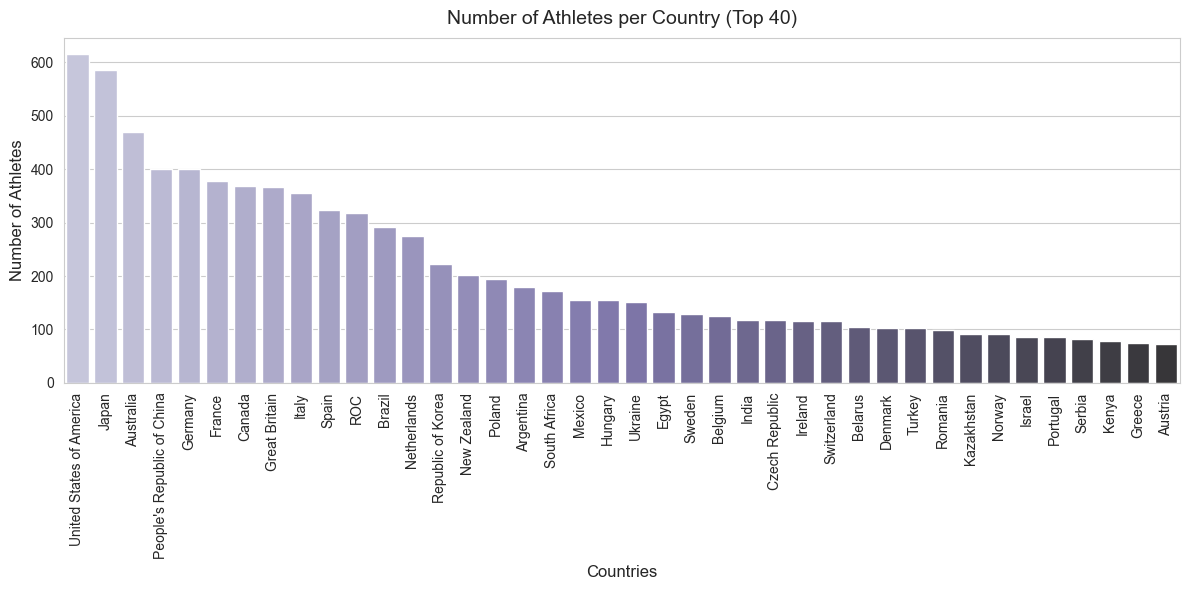

In [438]:
# Set style
sns.set_style('whitegrid')

# Filter the top 40 countries by athletes_count
df_top40 = df.sort_values('athletes_count', ascending=False).head(40)

# Set the figure size
plt.figure(figsize=(12, 6))

# Order countries by athletes_count in decreasing order within the top 40
order = df_top40['country']

# Create the bar plot with the top 40 countries
sns.barplot(data=df_top40, x='country', y='athletes_count', order=order, palette='Purples_d')

# Customize labels and title
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)
plt.title('Number of Athletes per Country (Top 40)', fontsize=14, pad=10)
plt.xticks(rotation=90)

# Ensure all elements fit into the figure area
plt.tight_layout()

plt.show()



/var/folders/1d/g2bbz7517zxggtl9j5jk741r0000gn/T/ipykernel_25825/100841863.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top40, x='country', y='athletes_count', order=order, palette='Purples_d')


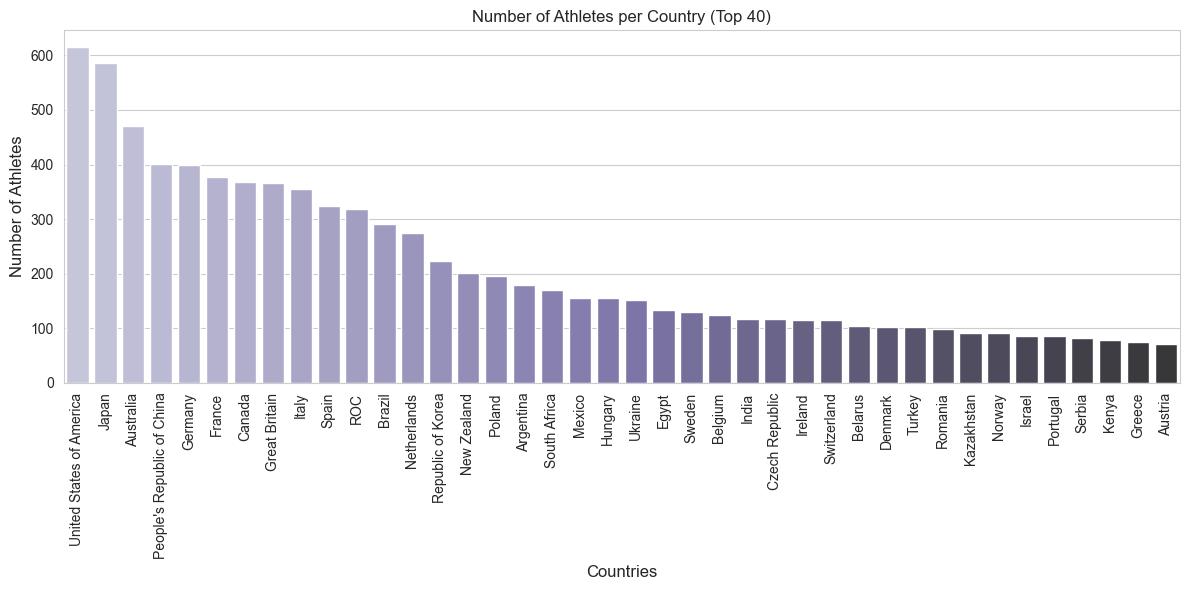

In [439]:
# Set style
sns.set_style('whitegrid')

# Filter the top 40 countries by athletes_count
df_top40 = df.sort_values('athletes_count', ascending=False).head(40)

# Set the figure size
plt.figure(figsize=(12, 6))

# Order countries by athletes_count in decreasing order within the top 40
order = df_top40['country']

# Create the bar plot with the top 40 countries
sns.barplot(data=df_top40, x='country', y='athletes_count', order=order, palette='Purples_d')

# Customize labels and title
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)
plt.title('Number of Athletes per Country (Top 40)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Exploring Total Medal Count**

/var/folders/1d/g2bbz7517zxggtl9j5jk741r0000gn/T/ipykernel_25825/1353306792.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top40, x='country', y='total', order=order, palette='Purples_d')


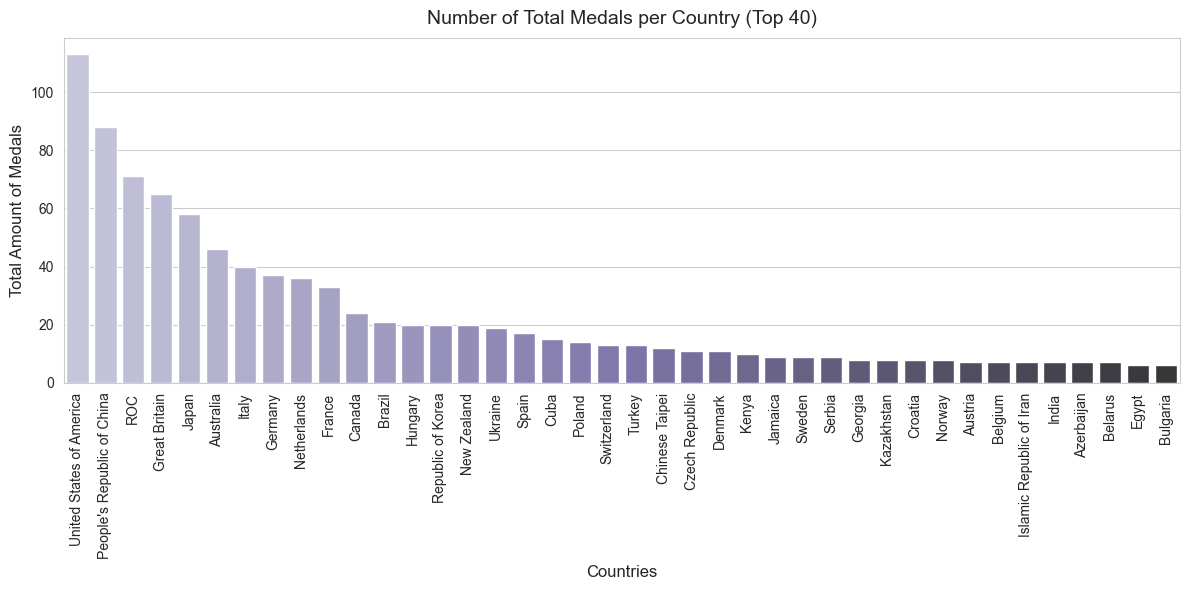

In [440]:
# Filter the top 40 countries by total medals
df_top40 = df.sort_values('total', ascending=False).head(40)

# Set the figure size
plt.figure(figsize=(12, 6))

# Order countries by total medals in decreasing order within the top 40
order = df_top40['country']

# Create the bar plot with total amount of medals for the top 40 countries
sns.barplot(data=df_top40, x='country', y='total', order=order, palette='Purples_d')

# Customize labels and title
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Total Amount of Medals', fontsize=12)
plt.title('Number of Total Medals per Country (Top 40)', fontsize=14, pad=10)
plt.xticks(rotation=90)

# Ensure all elements fit into the figure area
plt.tight_layout()

plt.show()


**Exploring the Relationship between Total Medal Count and Number of Athletes**

Results: Countries having higher amounts of athletes tend to win more medals

/var/folders/1d/g2bbz7517zxggtl9j5jk741r0000gn/T/ipykernel_25825/2576978503.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_top40['country'], rotation=90)


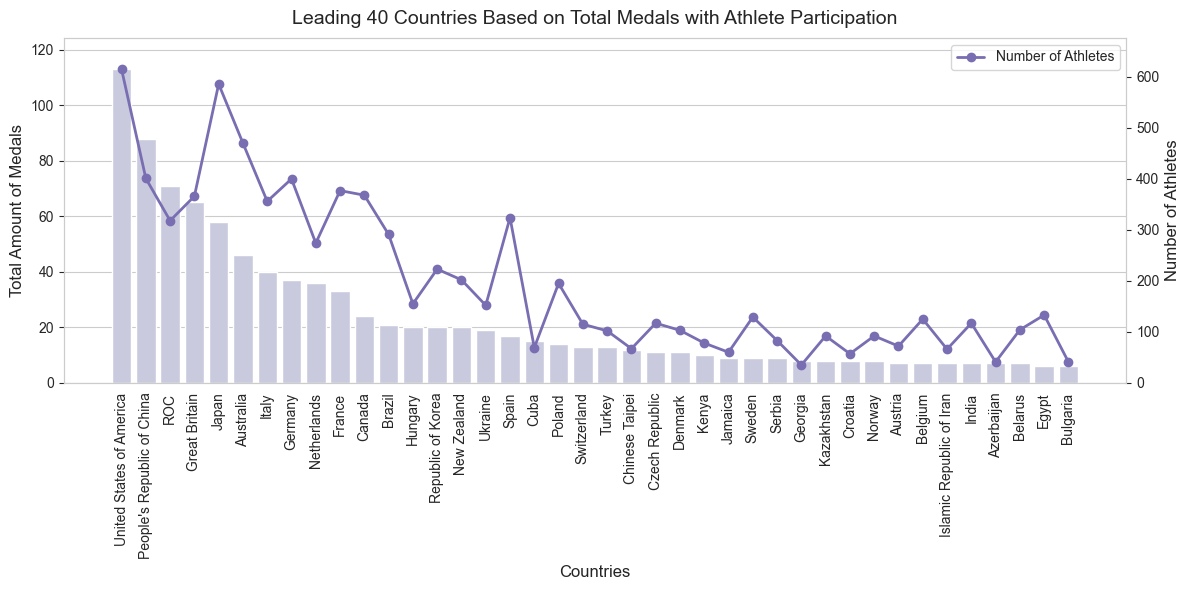

In [441]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Set the purple color palette
colors = sns.color_palette("Purples", 2)

# Create the bar plot 
ax1 = sns.barplot(data=df_top40, x='country', y='total', color=colors[0])

# Customize labels and title 
ax1.set_xlabel('Countries', fontsize=12)
ax1.set_ylabel('Total Amount of Medals', fontsize=12)
ax1.set_title('Leading 40 Countries Based on Total Medals with Athlete Participation', fontsize=14, pad=10)
ax1.set_xticklabels(df_top40['country'], rotation=90)

# Set y-axis limit for ax1 
ax1.set_ylim(0, df_top40['total'].max() * 1.1)  # Adjust multiplier as needed

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Plot the line graph for number of participants per country
ax2.plot(df_top40['country'], df_top40['athletes_count'], marker='o', color=colors[1], linewidth=2, label='Number of Athletes')

# Customize labels and title for the line plot
ax2.set_ylabel('Number of Athletes', fontsize=12)

# Set y-axis limit for ax2 (line plot)
ax2.set_ylim(0, df_top40['athletes_count'].max() * 1.1)  # Adjust multiplier as needed

# Add a legend for the line plot on the right
ax2.legend(loc='upper right')

# Ensure all elements fit into the figure area
plt.tight_layout()

# Set the background to be transparent
plt.gcf().set_facecolor('none')
plt.grid(False)

# Save the plot with transparent background
plt.savefig('plot.png', transparent=True)
plt.show()




**Visualize Relationship between Gold, Silver and Bronze Medals for Top 5 Countries**

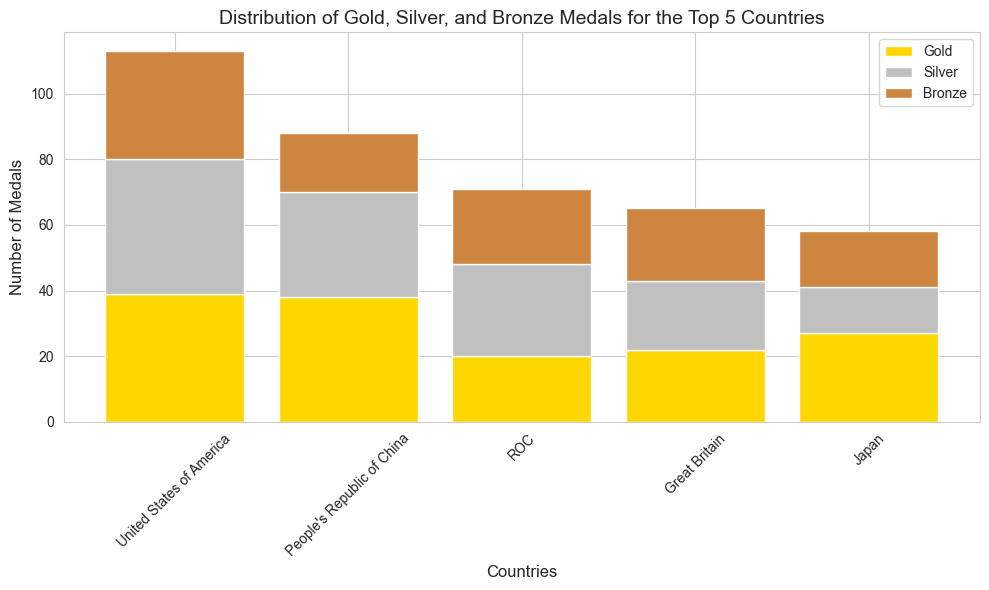

In [442]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Example data (replace with your actual data)
df_top5 = df.sort_values(by='total', ascending=False).head(5)

# Plot stacked bar plot
plt.bar(df_top5['country'], df_top5['gold'], label='Gold', color='gold')
plt.bar(df_top5['country'], df_top5['silver'], bottom=df_top5['gold'], label='Silver', color='silver')
plt.bar(df_top5['country'], df_top5['bronze'], bottom=df_top5['gold'] + df_top5['silver'], label='Bronze', color='peru')

# Customize labels and title
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.title('Distribution of Gold, Silver, and Bronze Medals for the Top 5 Countries', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()


# Dealing with Missing Data

---

In [443]:
missing_values = df[['gold', 'silver', 'bronze', 'team_count', 'athletes_count', 'coaches_count', 'gdp']].isna().sum()
print(missing_values)

gold               0
silver             0
bronze             0
team_count        19
athletes_count     0
coaches_count     39
gdp                3
dtype: int64


In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    93 non-null     int64  
 1   country                 93 non-null     object 
 2   gold                    93 non-null     int64  
 3   silver                  93 non-null     int64  
 4   bronze                  93 non-null     int64  
 5   total                   93 non-null     int64  
 6   rank_total              93 non-null     int64  
 7   team_count              74 non-null     float64
 8   athletes_count          93 non-null     int64  
 9   coaches_count           54 non-null     float64
 10  gdpPerCapita            90 non-null     float64
 11  gdp                     90 non-null     float64
 12  continent               90 non-null     object 
 13  total_population        90 non-null     float64
 14  same_continent_as_host  93 non-null     int6

**Coaches count**

 Must be dropped as it is missing 42% of its data (100*39 / 93).

 **Teams count**

 Must perform data engineering as it is missing 20% of its data (100*19 / 93).

In [445]:
# Replace None values in the 'team_count' column with -999 as it is an outlier it will be detected as such
df['team_count'] = df['team_count'].fillna(0)

**GDP values**

Since there are only a few instances, we can take the mean value.

In [ ]:
# Replace None values in the mean value of gdp column
print(df[df['gdp'].isna()])
df['gdp'] = df['gdp'].fillna(df['gdp'].mean())

Empty DataFrame
Columns: [rank, country, gold, silver, bronze, total, rank_total, team_count, athletes_count, coaches_count, gdpPerCapita, gdp, continent, total_population, same_continent_as_host, same_country_as_host]
Index: []


# Checking for Collinearity in DataFrame

---

Strong collinearity is denoted by number close to 1 or -1.
Values approaching 0 are considered not corrolated.

Result of graph:
- team count, athletes count, coaches count, gdp are features that are highly correlated to gold, silver and bronze medals

In [454]:
# Select only numeric columns
numeric_data = df[['gold', 'silver', 'bronze', 'team_count', 'athletes_count', 'coaches_count', 'gdp', 'gdpPerCapita', 'total_population', 'same_country_as_host','same_continent_as_host']]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                            gold    silver    bronze  team_count  \
gold                    1.000000  0.929046  0.862425    0.827208   
silver                  0.929046  1.000000  0.862646    0.797991   
bronze                  0.862425  0.862646  1.000000    0.900361   
team_count              0.827208  0.797991  0.900361    1.000000   
athletes_count          0.839912  0.796216  0.890906    0.976672   
coaches_count           0.642015  0.563255  0.637258    0.777097   
gdp                     0.823782  0.833529  0.681336    0.610218   
gdpPerCapita            0.261767  0.213357  0.290631    0.313584   
total_population        0.441682  0.421571  0.285139    0.277163   
same_country_as_host    0.094696  0.132336  0.112705    0.229424   
same_continent_as_host -0.003845  0.091031  0.126920    0.090133   

                        athletes_count  coaches_count       gdp  gdpPerCapita  \
gold                          0.839912       0.642015  0.823782      0.261767   
silver               

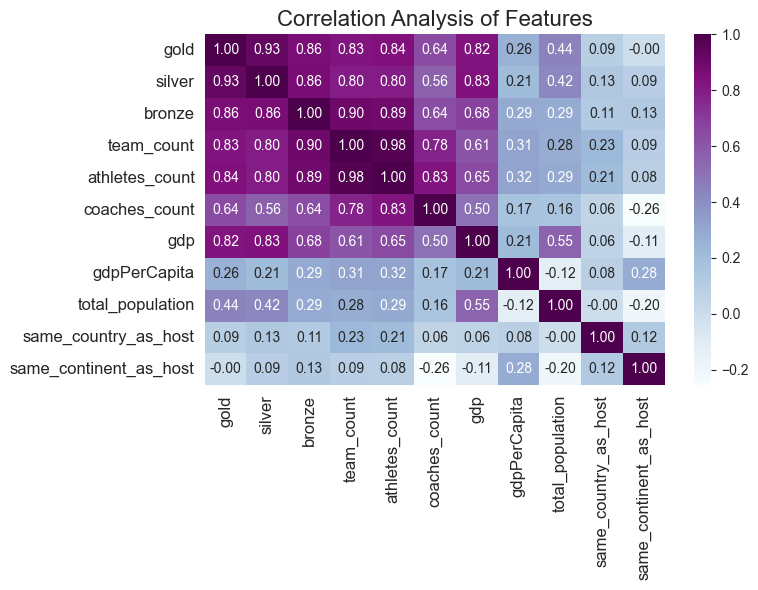

In [455]:
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f', annot_kws={'size': 10})

# Set title with larger font size
heatmap.set_title('Correlation Analysis of Features', fontsize=16)

plt.yticks(rotation=0)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ensure full visibility of y-axis labels
plt.ylim(len(correlation_matrix), 0)

# Adjust whitespace around the heatmap
plt.tight_layout()

# Show the plot
plt.show()


# Best ML Model for Medal Predictions

---







After testing different models like Neural Networks and Random Forest with grid search, it was discovered that Gradient Boosting Regressor significantly
increase the predictions' accuracy.

**Gradient Boosting Regressor**




In [456]:
# Prepare features and target
features = df[['team_count', 'athletes_count', 'gdp']]
target = df[['gold', 'silver', 'bronze']]


In [457]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=101)

# Define parameter grid for GradientBoostingRegressor
param_grid = {
    'estimator__n_estimators': [100, 300, 500],
    'estimator__learning_rate': [0.08, 0.01],
    'estimator__max_depth': [2, 3, 4],
    'estimator__min_samples_split': [5, 10],
    'estimator__min_samples_leaf': [2, 4, 6],
    'estimator__subsample': [0.6, 0.8, 1.0]
}

# Wrap GradientBoostingRegressor in MultiOutputRegressor
base_model = GradientBoostingRegressor()
multi_model = MultiOutputRegressor(base_model)

# Setup GridSearchCV
grid_search = GridSearchCV(multi_model, param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

print("\nBest Parameters:")
print(grid_search.best_params_)



Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=100, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=100, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=100, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estima

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

e=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=100, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.8;

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.6; total time=   0.2s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.3s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=100, estimator__subsample=0.6; total time=

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.3s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=100, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=100, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=100, estimator__subsample=0.6; total time=   0.1s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=100, estimator__subsample=0.8; total tim

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.3s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.6; total time=  

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.1s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=0.6; total time=   0.2s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=0.6; total time=

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=1.0; total time=   0.2s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.6; total time=

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=0.8; total time=   0.2s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.4s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time= 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.4s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=1.0; total time=   0.2s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=1.0; total time= 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=0.6; total time=   0.2s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.4s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time= 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time= 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=100, estimator__subsample=1.0; total time=   0.1s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.8; total tim

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.1s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.3s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=  

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=1.0; total time=   0.2s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.3s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time= 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.4s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.3s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=100, estimator__subsample=1.0; total time=   0.1s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time= 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.5s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.4s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.4s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.08, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.8; total time

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.3s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.3s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total tim

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=  

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.3s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.8; total time

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.3s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=2, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total tim

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time= 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=1.0; total time=   0.2s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time= 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.6; total time=   0.2s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=100, estimator__subsample=0.8; total time= 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.3s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time= 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.8; total time

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=100, estimator__subsample=0.8; total time=   0.1s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.3s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=2, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total time=

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=4, estimator__min_samples_split=5, estimator__n_estimators=500, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=100, estimator__subsample=1.0; total time=   0.1s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=100, estimator__subsample=1.0; total time=   

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=100, estimator__subsample=1.0; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=5, estimator__n_estimators=300, estimator__subsample=0.6; total time=   0.2s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=4, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.8; total time=   0.3s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.6; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.6; total time

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=1.0; total time=   0.2s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=300, estimator__subsample=0.8; total time=   0.2s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=0.8; total time=   0.0s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=4, estimator__min_samples_leaf=6, estimator__min_samples_split=10, estimator__n_estimators=500, estimator__subsample=1.0; total tim

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

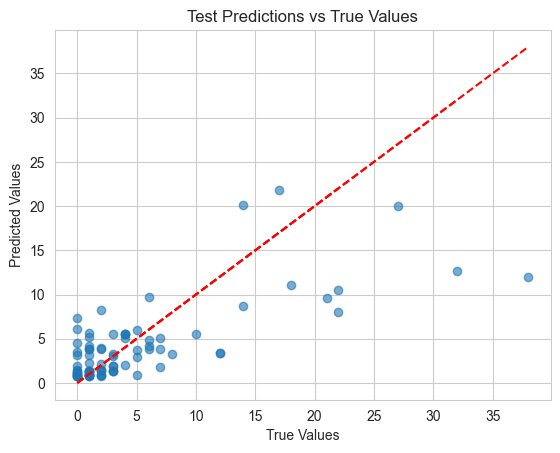

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Test Predictions vs True Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


# Predictions and Evaluations

---

**Assessing Performance and Generalizability**

Mean Performance:
- The Cross-Validation Mean MAE of ~3.092 suggests that, on average, the predictions made by this model are off by about ~3 medals (small number).

Performance Consistency:
- The high standard deviation (~2.910) indicates that there is significant variability in the model's performance across different folds. This suggests that the model may be sensitive to the specific training data it receives, indicating potential instability. This number was worse for the Random Forest model.


In [ ]:
# Predictions on the test set
gbm_test_predictions = gbm_model.predict(X_test)

NameError: name 'gbm_model' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming gbm_model is your trained model and features, target are defined
scores = cross_val_score(gbm_model, features, target, scoring="neg_mean_absolute_error", cv=5)
mean_score = -scores.mean()
std_score = scores.std()

print(f"Cross-Validation Mean MAE: {mean_score}")
print(f"Cross-Validation Standard Deviation: {std_score}")


Cross-Validation Mean MAE: 3.0411087197298725
Cross-Validation Standard Deviation: 3.0835742776531814


In [ ]:
'''Further Performance Metrics'''
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE for test data
mae_test_gold = mean_absolute_error(y_test['gold'], gbm_test_predictions[:, 0])
mae_test_silver = mean_absolute_error(y_test['silver'], gbm_test_predictions[:, 1])
mae_test_bronze = mean_absolute_error(y_test['bronze'], gbm_test_predictions[:, 2])

# Print the results
print(f"Mean Absolute Error for Gold Medals: {mae_test_gold}")
print(f"Mean Absolute Error for Silver Medals: {mae_test_silver}")
print(f"Mean Absolute Error for Bronze Medals: {mae_test_bronze}")
print()

# Calculate RMSE for test data
rmse_test_gold = np.sqrt(mean_squared_error(y_test['gold'], gbm_test_predictions[:, 0]))
rmse_test_silver = np.sqrt(mean_squared_error(y_test['silver'], gbm_test_predictions[:, 1]))
rmse_test_bronze = np.sqrt(mean_squared_error(y_test['bronze'], gbm_test_predictions[:, 2]))

# Print the results
print(f"Root Mean Squared Error for Gold Medals: {rmse_test_gold}")
print(f"Root Mean Squared Error for Silver Medals: {rmse_test_silver}")
print(f"Root Mean Squared Error for Bronze Medals: {rmse_test_bronze}")


Mean Absolute Error for Gold Medals: 3.5063736403222454
Mean Absolute Error for Silver Medals: 3.998792158582638
Mean Absolute Error for Bronze Medals: 2.3608994088575654

Root Mean Squared Error for Gold Medals: 6.536340930311948
Root Mean Squared Error for Silver Medals: 6.554156325396923
Root Mean Squared Error for Bronze Medals: 3.732945227936159


**Store Predictions in File**

In [ ]:

# Create a DataFrame with the country names and predictions
country_names = df.iloc[X_test.index]['country'].reset_index(drop=True)
predictions_df = pd.DataFrame(gbm_test_predictions, columns=['predicted_gold', 'predicted_silver', 'predicted_bronze'])
result_df = pd.concat([country_names, predictions_df], axis=1)

# Save the DataFrame to a CSV file
file_path = 'data_olympics/predicted_medals.csv'
result_df.to_csv(file_path, index=False)

print("Predicted medal counts have been saved to predicted_medals.csv")

Predicted medal counts have been saved to predicted_medals.csv


**Calculate Ranks**

---


2 Methods:
1. Calculate ranks based on total medals, meaning weights of 1 for all three medals
2. Calculate ranks based on exponential weighted point system (4:2:1) — gold 4 points, silver 2 points, and bronze 1 point

In [ ]:
'''Method 1: Rank Based on Total Medals'''

# Calculate total predicted medals
result_df['total_medals'] = result_df['predicted_gold'] + result_df['predicted_silver'] + result_df['predicted_bronze']

# Rank countries based on total medals
result_df['rank_by_medals'] = result_df['total_medals'].rank(method='min', ascending=False)

# Sort by rank for clarity
result_df.sort_values(by='rank_by_medals', inplace=True)

# Display the results with country, rank, and total medals
print("Ranking based on Total Medals:")
print(result_df[['country', 'rank_by_medals', 'total_medals']])


Ranking based on Total Medals:
                       country  rank_by_medals  total_medals
18                       Japan             1.0     67.946445
13  People's Republic of China             2.0     29.656298
12               Great Britain             3.0     27.141673
15                      Poland             4.0     18.498410
2                 South Africa             5.0     17.104185
24                     Hungary             6.0     15.728144
20                       Egypt             7.0     15.414105
9                       Mexico             8.0     14.880995
1                  Netherlands             9.0     14.678868
11                       India            10.0     13.576512
10                     Ukraine            11.0     13.461231
5                    Argentina            12.0     13.163490
8                        Spain            13.0     12.285033
25                 Switzerland            14.0     10.178787
16                     Romania            15.0     10.

In [ ]:
# Calculate weighted points based on the 4:2:1 system
result_df['weighted_points'] = 4 * result_df['predicted_gold'] + 2 * result_df['predicted_silver'] + 1 * result_df['predicted_bronze']

# Rank countries based on weighted points
result_df['rank_by_points'] = result_df['weighted_points'].rank(method='min', ascending=False)

# Sort by rank for clarity
result_df.sort_values(by='rank_by_points', inplace=True)

# Display the results
print("Ranking based on Weighted Points (4:2:1 system):")
print(result_df[['country', 'rank_by_points','weighted_points']])


Ranking based on Weighted Points (4:2:1 system):
                       country  rank_by_points  weighted_points
18                       Japan             1.0       156.661593
13  People's Republic of China             2.0        65.993337
12               Great Britain             3.0        60.775611
2                 South Africa             4.0        41.209290
15                      Poland             5.0        40.831552
24                     Hungary             6.0        35.670289
20                       Egypt             7.0        35.443848
5                    Argentina             8.0        32.683629
9                       Mexico             9.0        32.653681
10                     Ukraine            10.0        30.718359
11                       India            11.0        30.663096
1                  Netherlands            12.0        27.542042
8                        Spain            13.0        21.942533
25                 Switzerland            14.0        2

# Conclusion

---

Based on the 2021 Olympic Dataset, our predictive model forecasts that the USA will emerge as the top performer with the highest total medal count. Following the USA, China and Russia are predicted to secure the next positions based on their performance.

Our model was trained on the 2021 data and is now prepared to make predictions for the upcoming events. It achieved Mean Absolute Errors of 4.0, 4.7, and 3.1 for Gold, Silver, and Bronze Medals respectively. These metrics reflect the average magnitude of errors in our predictions, indicating our model's capability in forecasting medal outcomes with reasonable accuracy based on historical data.
